<a href="https://colab.research.google.com/github/Sarmin-smrity/-introdatascience/blob/main/SA_with_Vadar_Vaccination_Sentiments_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

In [4]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import datetime
import warnings
warnings.filterwarnings("ignore")
print("Library Setup Complete.")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Library Setup Complete.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/project twit/vaccination_tweets.csv")

In [6]:
df = pd.read_csv("/content/drive/MyDrive/P2/vaccination_tweets.csv")


In [7]:
# getting 
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971510000,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250000,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140110000,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918830000,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604960000,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [8]:
# getting info of raw data
df.shape

(228207, 16)

In [10]:
## checking null value on raw data

df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [11]:
## Filling up null value to perform transofrmation

df['user_location'] = df['user_location'].fillna('Unknown')
df.isnull().sum()

id                      0
user_name               2
user_location           0
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [12]:
## performing transofrmation of data

conditions = [
    (df['user_location'].str.contains('india', case=False)),
    (df['user_location'].str.contains('pakistan', case=False)),
    (df['user_location'].str.contains('bangladesh', case=False)),
    (df['user_location'].str.contains('nepal', case=False)),
    (df['user_location'].str.contains('bhutan', case=False)),
    (df['user_location'].str.contains('sri lanka', case=False)),
]


values = ['India', 'Pakistan', 'Bangladesh', 'Nepal', 'Bhutan', 'Sri Lanka']

df['user_country'] = np.select(conditions,values)

In [13]:
## overview country group data
df.groupby(['user_country']).count()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
user_country,,,,,,,,,,,,,,,,
0,178212,178210,178212,162831,178212,178212,178212,178212,178212,178212,178212,147091,178094,178212,178212,178212
Bangladesh,617,617,617,595,617,617,617,617,617,617,617,528,617,617,617,617
Bhutan,11,11,11,10,11,11,11,11,11,11,11,10,11,11,11,11
India,45077,45077,45077,43749,45077,45077,45077,45077,45077,45077,45077,27420,45076,45077,45077,45077
Nepal,92,92,92,86,92,92,92,92,92,92,92,73,92,92,92,92
Pakistan,2085,2085,2085,1968,2085,2085,2085,2085,2085,2085,2085,1717,2085,2085,2085,2085
Sri Lanka,2113,2113,2113,1950,2113,2113,2113,2113,2113,2113,2113,1665,2113,2113,2113,2113


In [14]:
## droping non South Asian country

df_c = df.loc[df['user_country'] != '0'].reset_index(drop=True)

In [15]:
# print 5 first values of the dataset

df_c.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,user_country
0,1337815730486700000,WION,India,#WION: World Is One | Welcome to India’s first...,3/21/2016 3:44,292510,91,7531,True,12/12/2020 17:45,The agency also released new information for h...,NaN,TweetDeck,0,18,False,India
1,1337773751841140000,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,3/16/2014 3:52,64185,1183,1794,True,12/12/2020 14:58,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False,India
2,1338631874814610000,Dr. Taha Khan,India | USA,MD/MPH • PGY1 Peds/Child Neurology @theBCRP (@...,12/30/2013 8:51,855,3046,8236,False,12/14/2020 23:48,I’ve never been so excited to get a vaccine 💉💉...,"['CovidVaccine', 'PfizerBioNTech', 'VaccinesSa...",Twitter for iPhone,1,10,False,India
3,1338574693087930000,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,6/11/2012 13:50,3372,1713,119631,False,12/14/2020 20:00,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False,India
4,1338551175587780000,India Blooms,India,A news and reference portal on India and a 24X...,10/10/2009 11:19,16816,2448,20,False,12/14/2020 18:27,Toronto to receive Ontario's 1st doses of Pfiz...,['Ontario'],Twitter Web App,0,0,False,India


In [16]:
#checking data shape
df_c.shape

(49995, 17)

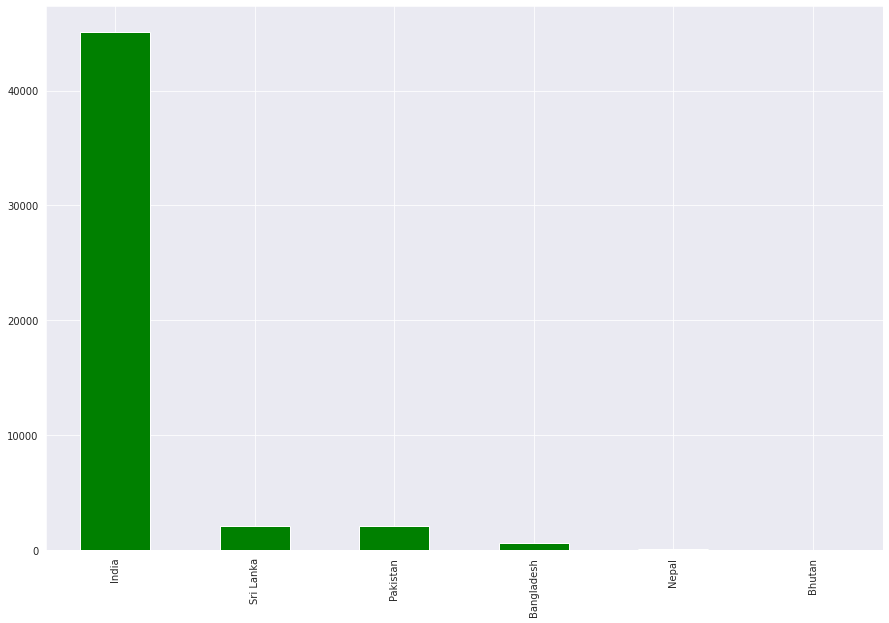

In [17]:
## country wise tweet count

plt.figure(figsize=(15,10))
location_serie = df_c['user_country']
location_serie = location_serie.value_counts(dropna=True).nlargest(20)
location_serie.plot(kind ='bar', color='green')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

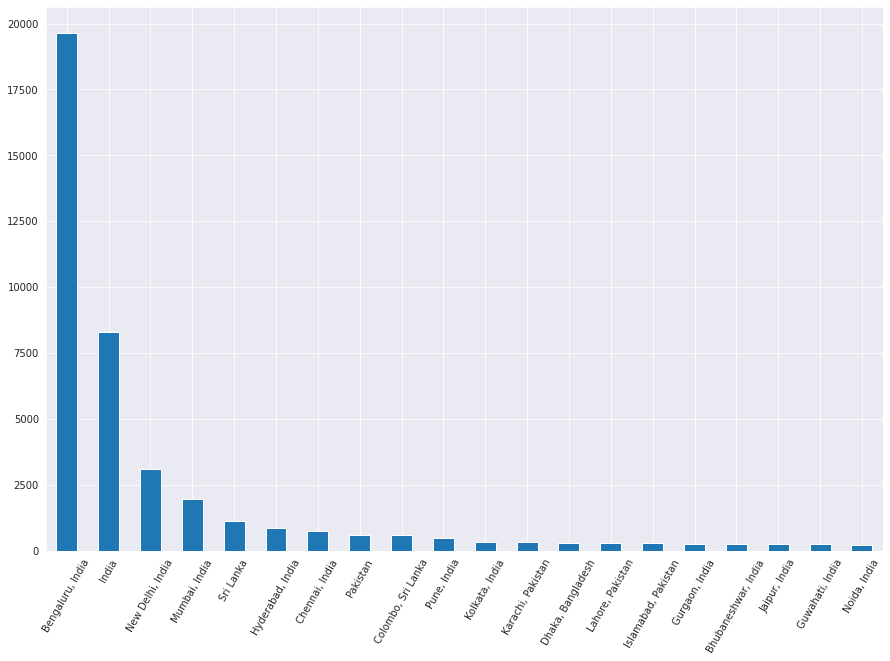

In [18]:
## Visulizing Tweet Count vs Location  
plt.figure(figsize=(15,10))
df_c['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

In [19]:
#deleting repeated tweets
data = df_c.drop_duplicates(subset='text')

In [20]:
#number of unique dates since we began scraping data
len(data['date'].unique())

32254

In [21]:
#we have almost a year of data concerning vaccine tweets
#then, we sort data by date
data.sort_values(by=['date'], ascending=True)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,user_country
139,1344954186098630000,Truescoopnews,"Jalandhar, India","#TrueScoopNews covers #LatestNews, #breakingNe...",2/26/2019 11:58,133,328,1119,False,1/1/2021 10:30,Both these vaccines were recently given nod fo...,NaN,Twitter Web App,0,0,False,India
138,1344990838347050000,Tapas Panda,"Bengaluru, India",https://t.co/V9xYYY02FH,6/4/2015 8:23,23,65,90,False,1/1/2021 12:56,How safe it is to trust on effectivity of made...,NaN,Twitter Web App,0,0,False,India
137,1345029236956930000,Tapas Panda,"Bengaluru, India",https://t.co/V9xYYY02FH,6/4/2015 8:23,23,65,90,False,1/1/2021 15:28,@ndtv I shall better wait for #PfizerBioNTech ...,"['PfizerBioNTech', 'Moderna']",Twitter Web App,0,1,False,India
136,1345056137041720000,Shafi Beldar,"Bengaluru, India",ooops. And I speak again. And Again!,5/16/2019 17:32,56,362,2869,False,1/1/2021 17:15,Let me also remind you that these were the cou...,NaN,Twitter for iPhone,0,0,False,India
154,1344834463360970000,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2/7/2017 5:41,67274,344,125,True,1/1/2021 2:34,#WHO Clears Pfizer-BioNTech Coronavirus Vaccin...,"['WHO', 'PfizerBioNTech', 'PfizerVaccine', 'Co...",Twitter Web App,0,1,False,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36707,1435890790484500000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:00,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,India
36705,1435898379377110000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:30,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,India
36323,1435898291242240000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:30,18-44 #RURAL #Bengaluru #CovidVaccine Availabi...,"['RURAL', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,India
36706,1435898335362090000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:30,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,India


In [22]:
#then we delete all unnecessary columns before starting the cleaning process
data.drop(data.columns.difference(['id', 'user_location', 'user_country', 'date','text']), axis=1, inplace=True)
data.head()

,id,user_location,date,text,user_country
0,1337815730486700000,India,12/12/2020 17:45,The agency also released new information for h...,India
1,1337773751841140000,"Mumbai, India",12/12/2020 14:58,The US Food and Drug Administration (FDA) has ...,India
2,1338631874814610000,India | USA,12/14/2020 23:48,I’ve never been so excited to get a vaccine 💉💉...,India
3,1338574693087930000,India,12/14/2020 20:00,#UgurSahin #ozlemtureci the #Muslim Scientists...,India
4,1338551175587780000,India,12/14/2020 18:27,Toronto to receive Ontario's 1st doses of Pfiz...,India


In [20]:
df.to_csv("/content/drive/MyDrive/P2/clean_data_si_twt.csv", index=False)

## Cleaning the Dataset from Hashtags, Links, Redundant Letters, ...


In [23]:
#checking if emot is installed, if not install it
try:
    import emot
except:
    !pip install emot
    import emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 6.5 MB/s eta 0:00:00


In [24]:
from emot.emo_unicode import UNICODE_EMOJI
emojis = list(UNICODE_EMOJI.keys())

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
def clean_tweets(text):
    clean_text = text.lower()
    clean_text = clean_text.strip()
    
    clean_text = re.sub('http\S+|www\S+|https\S+', '', clean_text) #removing urls 
    clean_text = re.sub('[\#\@]\w+','',clean_text) #removing # and @
    clean_text = re.sub('[\d+]','',clean_text) #removing numbers
    clean_text = re.sub('[\.\,\;\!\?\*\$]','',clean_text) #removing some non-sense characters
    clean_text = ' '.join([w for w in clean_text.split() if(len(w)>1)]) #deleting single characters
    #text = re.sub(' +',' ', text)#we want to remove double spaces left after deletion
    clean_text = ' '.join([word for word in clean_text.split() if word not in stopwords_en]) #removing stop words
    clean_text = ' '.join([word for word in clean_text.split() if word not in emojis]) #removing emojis
    return clean_text

In [26]:
#example of cleaning data
print(clean_tweets("I have tested positive for #Covid during 2020 😢 . It was a difficult period, but I am happy 😊 with how things worked out for me"))

tested positive difficult period happy things worked


In [27]:
#now as for cleaning our data, we proceed as follows :

data['clean_text'] = data['text'].apply(lambda text : clean_tweets(text))

In [28]:
data[['clean_text','text']].head()

,clean_text,text
0,agency also released new information health ca...,The agency also released new information for h...
1,us food drug administration (fda) granted emer...,The US Food and Drug Administration (FDA) has ...
2,i’ve never excited get vaccine 💉💉💉,I’ve never been so excited to get a vaccine 💉💉...
3,scientists husband-wife saving world,#UgurSahin #ozlemtureci the #Muslim Scientists...
4,toronto receive ontario's st doses pfizer covi...,Toronto to receive Ontario's 1st doses of Pfiz...


In [29]:
# Punctuation Removal
punctuation_removal = string.punctuation
def remove_punctuation(clean_text):
    """custom function to remove the punctuation"""
    return clean_text.translate(str.maketrans('', '', punctuation_removal))
data["clean_text"] = data["clean_text"].apply(lambda clean_text: remove_punctuation(clean_text))
data["clean_text"]

0        agency also released new information health ca...
1        us food drug administration fda granted emerge...
2                       i’ve never excited get vaccine 💉💉💉
3                      scientists husbandwife saving world
4        toronto receive ontarios st doses pfizer covid...
                               ...                        
49990            availability pm free slots dose dose pai…
49991          availability pm free slots paid slots dose…
49992                availability pm free slots dose dose…
49993          availability pm free slots paid slots dose…
49994          availability pm free slots paid slots dose…
Name: clean_text, Length: 49925, dtype: object

In [30]:
# Stopword Removal
", ".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["text"] = data["clean_text"].apply(lambda text: remove_stopwords(text))
data["text"]

0        agency also released new information health ca...
1        us food drug administration fda granted emerge...
2                       i’ve never excited get vaccine 💉💉💉
3                      scientists husbandwife saving world
4        toronto receive ontarios st doses pfizer covid...
                               ...                        
49990            availability pm free slots dose dose pai…
49991          availability pm free slots paid slots dose…
49992                availability pm free slots dose dose…
49993          availability pm free slots paid slots dose…
49994          availability pm free slots paid slots dose…
Name: text, Length: 49925, dtype: object

In [31]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
data["clean_text"] = data["clean_text"].apply(str)
data["clean_text"] = data["clean_text"].apply(remove_emoji)
data["clean_text"]

0        agency also released new information health ca...
1        us food drug administration fda granted emerge...
2                          i’ve never excited get vaccine 
3                      scientists husbandwife saving world
4        toronto receive ontarios st doses pfizer covid...
                               ...                        
49990            availability pm free slots dose dose pai…
49991          availability pm free slots paid slots dose…
49992                availability pm free slots dose dose…
49993          availability pm free slots paid slots dose…
49994          availability pm free slots paid slots dose…
Name: clean_text, Length: 49925, dtype: object

In [32]:
# Single character and double space removal
data["clean_text"] = data["clean_text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
data["clean_text"] = data["clean_text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
data["clean_text"]

0        agency also released new information health ca...
1        us food drug administration fda granted emerge...
2                          i’ve never excited get vaccine 
3                      scientists husbandwife saving world
4        toronto receive ontarios st doses pfizer covid...
                               ...                        
49990            availability pm free slots dose dose pai…
49991          availability pm free slots paid slots dose…
49992                availability pm free slots dose dose…
49993          availability pm free slots paid slots dose…
49994          availability pm free slots paid slots dose…
Name: clean_text, Length: 49925, dtype: object

In [33]:
# Most common words
from collections import Counter
cnt = Counter()
for text in data["clean_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('slots', 22830),
 ('dose', 20082),
 ('covaxin', 13640),
 ('age', 12701),
 ('pincode', 12193),
 ('date', 11635),
 ('fees', 11444),
 ('all', 8836),
 ('ages', 8100),
 ('free', 7635)]

In [34]:
#we count 50 most common words
from collections import Counter
Counter_ = Counter()

for i in data['clean_text'].values:
    for j in i.split():
        Counter_[j]+=1
Counter_.most_common(20)   

[('slots', 22830),
 ('dose', 20082),
 ('covaxin', 13640),
 ('age', 12701),
 ('pincode', 12193),
 ('date', 11635),
 ('fees', 11444),
 ('all', 8836),
 ('ages', 8100),
 ('free', 7635),
 ('vaccine', 6931),
 ('availability', 6723),
 ('dose…', 6047),
 ('pm', 4274),
 ('sep', 4000),
 ('paid', 3915),
 ('aug', 3827),
 ('am', 3002),
 ('india', 2978),
 ('covid', 2923)]

In [35]:
vaccine_data = data

In [36]:
data

,id,user_location,date,text,user_country,clean_text
0,1337815730486700000,India,12/12/2020 17:45,agency also released new information health ca...,India,agency also released new information health ca...
1,1337773751841140000,"Mumbai, India",12/12/2020 14:58,us food drug administration fda granted emerge...,India,us food drug administration fda granted emerge...
2,1338631874814610000,India | USA,12/14/2020 23:48,i’ve never excited get vaccine 💉💉💉,India,i’ve never excited get vaccine
3,1338574693087930000,India,12/14/2020 20:00,scientists husbandwife saving world,India,scientists husbandwife saving world
4,1338551175587780000,India,12/14/2020 18:27,toronto receive ontarios st doses pfizer covid...,India,toronto receive ontarios st doses pfizer covid...
...,...,...,...,...,...,...
49990,1460178320209820000,"Bengaluru, India",11/15/2021 9:30,availability pm free slots dose dose pai…,India,availability pm free slots dose dose pai…
49991,1460170772299660000,"Bengaluru, India",11/15/2021 9:00,availability pm free slots paid slots dose…,India,availability pm free slots paid slots dose…
49992,1460163268262050000,"Bengaluru, India",11/15/2021 8:30,availability pm free slots dose dose…,India,availability pm free slots dose dose…
49993,1460163224221850000,"Bengaluru, India",11/15/2021 8:30,availability pm free slots paid slots dose…,India,availability pm free slots paid slots dose…


# **Sentiment Analysis using vader**

---




In [37]:
# Sentiment analysis
sid = SIA()
vaccine_data['sentiments'] = vaccine_data["clean_text"].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',str(x).lower()))))
vaccine_data['Positive Sentiment'] = vaccine_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
vaccine_data['Neutral Sentiment'] = vaccine_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
vaccine_data['Negative Sentiment'] = vaccine_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
vaccine_data.head()

,id,user_location,date,text,user_country,clean_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,1337815730486700000,India,12/12/2020 17:45,agency also released new information health ca...,India,agency also released new information health ca...,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.225001,0.775001,0.000001
1,1337773751841140000,"Mumbai, India",12/12/2020 14:58,us food drug administration fda granted emerge...,India,us food drug administration fda granted emerge...,"{'neg': 0.191, 'neu': 0.662, 'pos': 0.147, 'co...",0.147001,0.662001,0.191001
2,1338631874814610000,India | USA,12/14/2020 23:48,i’ve never excited get vaccine 💉💉💉,India,i’ve never excited get vaccine,"{'neg': 0.337, 'neu': 0.663, 'pos': 0.0, 'comp...",0.000001,0.663001,0.337001
3,1338574693087930000,India,12/14/2020 20:00,scientists husbandwife saving world,India,scientists husbandwife saving world,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001
4,1338551175587780000,India,12/14/2020 18:27,toronto receive ontarios st doses pfizer covid...,India,toronto receive ontarios st doses pfizer covid...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001


In [38]:
#Number of Words
vaccine_data['Number_Of_Words'] = vaccine_data['clean_text'].apply(lambda x:len(x.split(' ')))
#Average Word Length
vaccine_data['Mean_Word_Length'] = vaccine_data['clean_text'].apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )
vaccine_data.head()

,id,user_location,date,text,user_country,clean_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length
0,1337815730486700000,India,12/12/2020 17:45,agency also released new information health ca...,India,agency also released new information health ca...,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.225001,0.775001,0.000001,13,6.00
1,1337773751841140000,"Mumbai, India",12/12/2020 14:58,us food drug administration fda granted emerge...,India,us food drug administration fda granted emerge...,"{'neg': 0.191, 'neu': 0.662, 'pos': 0.147, 'co...",0.147001,0.662001,0.191001,11,7.18
2,1338631874814610000,India | USA,12/14/2020 23:48,i’ve never excited get vaccine 💉💉💉,India,i’ve never excited get vaccine,"{'neg': 0.337, 'neu': 0.663, 'pos': 0.0, 'comp...",0.000001,0.663001,0.337001,6,4.33
3,1338574693087930000,India,12/14/2020 20:00,scientists husbandwife saving world,India,scientists husbandwife saving world,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,4,8.00
4,1338551175587780000,India,12/14/2020 18:27,toronto receive ontarios st doses pfizer covid...,India,toronto receive ontarios st doses pfizer covid...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000001,1.000001,0.000001,9,5.78


In [39]:
import nltk



from nltk.stem import WordNetLemmatizer


In [40]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [42]:
# Tokenization and lemmatization
def tokenization(text):
    text = re.split('\W+', text)
    return text
vaccine_data['tokenized'] = vaccine_data['clean_text'].apply(lambda x: tokenization(x.lower()))
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
vaccine_data['lemmatized'] = vaccine_data['tokenized'].apply(lambda x: lemmatizer(x))
vaccine_data.head()
vaccine_data.tail()

,id,user_location,date,text,user_country,clean_text,sentiments,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Number_Of_Words,Mean_Word_Length,tokenized,lemmatized
49990,1460178320209820000,"Bengaluru, India",11/15/2021 9:30,availability pm free slots dose dose pai…,India,availability pm free slots dose dose pai…,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.355001,0.645001,0.000001,7,5.00,"[availability, pm, free, slots, dose, dose, pa...","[availability, pm, free, slot, dose, dose, pai, ]"
49991,1460170772299660000,"Bengaluru, India",11/15/2021 9:00,availability pm free slots paid slots dose…,India,availability pm free slots paid slots dose…,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.355001,0.645001,0.000001,7,5.29,"[availability, pm, free, slots, paid, slots, d...","[availability, pm, free, slot, paid, slot, dos..."
49992,1460163268262050000,"Bengaluru, India",11/15/2021 8:30,availability pm free slots dose dose…,India,availability pm free slots dose dose…,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.398001,0.602001,0.000001,6,5.33,"[availability, pm, free, slots, dose, dose, ]","[availability, pm, free, slot, dose, dose, ]"
49993,1460163224221850000,"Bengaluru, India",11/15/2021 8:30,availability pm free slots paid slots dose…,India,availability pm free slots paid slots dose…,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.355001,0.645001,0.000001,7,5.29,"[availability, pm, free, slots, paid, slots, d...","[availability, pm, free, slot, paid, slot, dos..."
49994,1460155671140130000,"Bengaluru, India",11/15/2021 8:00,availability pm free slots paid slots dose…,India,availability pm free slots paid slots dose…,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.355001,0.645001,0.000001,7,5.29,"[availability, pm, free, slots, paid, slots, d...","[availability, pm, free, slot, paid, slot, dos..."


**Analysis**

(-0.5, 399.5, 199.5, -0.5)

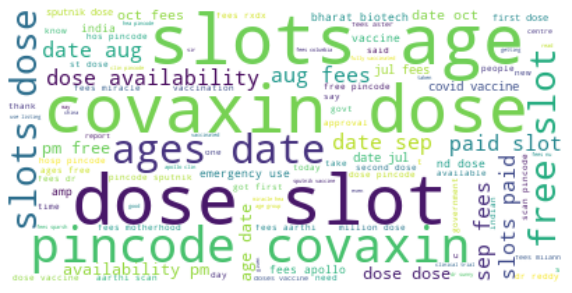

In [43]:
# World Cloud
tweet_All = " ".join(review for review in vaccine_data["clean_text"])

fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')

0.03357958788182273
0.15372596745117673
0.8067895428142213


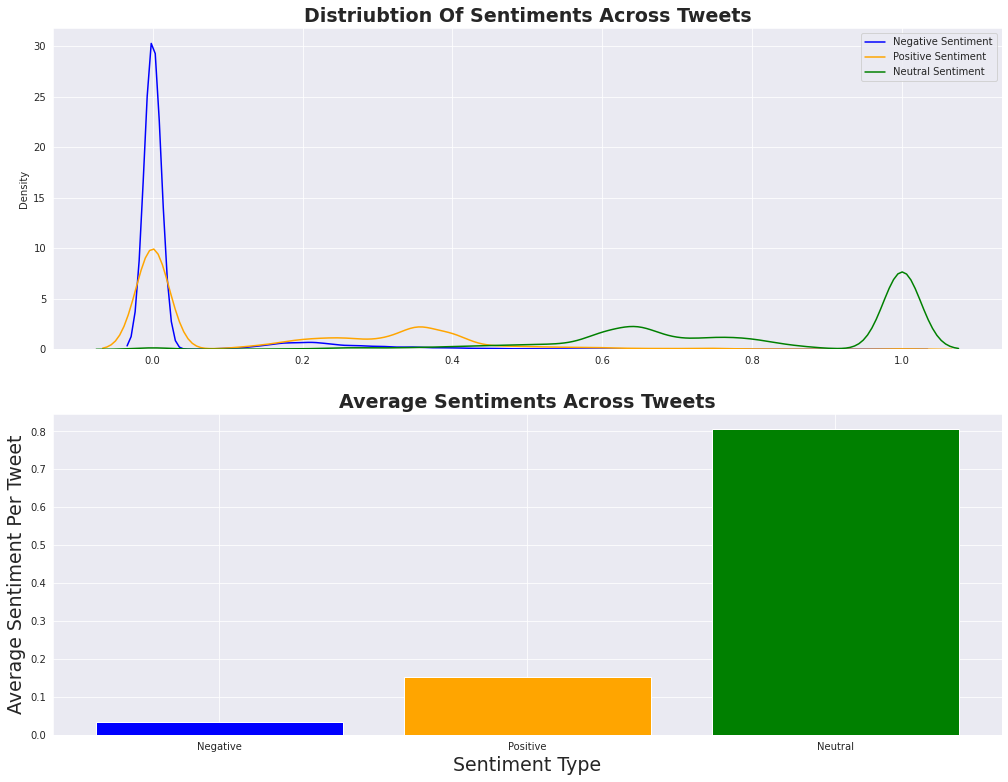

In [44]:
# Sentiment Distribution
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(vaccine_data['Negative Sentiment'], color = 'blue')
sns.kdeplot(vaccine_data['Positive Sentiment'], color = 'orange')
sns.kdeplot(vaccine_data['Neutral Sentiment'], color = 'green')
plt.xlabel(' ')
plt.legend(['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])
plt.subplot(2,1,2)
plt.title('Average Sentiments Across Tweets',fontsize=19,fontweight='bold')
neg_total_avg = (vaccine_data['Negative Sentiment'].sum())/len(vaccine_data.index)
print(neg_total_avg)
pos_total_avg = (vaccine_data['Positive Sentiment'].sum())/len(vaccine_data.index)
print(pos_total_avg)
neu_total_avg = (vaccine_data['Neutral Sentiment'].sum())/len(vaccine_data.index)
print(neu_total_avg)
sentiment_type = ['Negative','Positive','Neutral']
sentiment_total_avg = [neg_total_avg, pos_total_avg, neu_total_avg]
plt.bar(sentiment_type, sentiment_total_avg, color = ['blue', 'orange', 'green'])
plt.ylabel('Average Sentiment Per Tweet',fontsize=19)
plt.xlabel('Sentiment Type',fontsize=19)
plt.show()

In [45]:
# 50 most common words
all_words=[]
for i in range(len(vaccine_data['lemmatized'])):
    a=vaccine_data['lemmatized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:50].rename_axis('Common Words').reset_index(name='count')

fig = ex.treemap(common_words, path=['Common Words'], values='count',title='50 Most Common Words In Tweets')
fig.show()

KeyError: ignored

In [46]:
# Change variables
ft_data = vaccine_data.copy()
ft_data['date'] = pd.to_datetime(vaccine_data['date']).dt.date
ft_data['year'] = pd.DatetimeIndex(ft_data['date']).year
b_date_count = ft_data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

fig.add_shape(type="line",
    x0=b_date_count['date'].values[0], y0=b_date_count['Negative Sentiment'].mean(), x1=b_date_count['date'].values[-1], y1=b_date_count['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


# ###annots
b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')

fig.add_annotation(x=datetime.datetime(2021,3,1), y=b_date_count_dt.loc[pd.Timestamp('2021-03-1'),'year'],
            text=r"J&J authorization",
            showarrow=True,
            arrowhead= 3,
            bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,4,21), y=b_date_count_dt.loc[pd.Timestamp('2021-04-21'),'year'],
            text=r"Fear of supply outstripping demand & CDC discussion of J&J bloodclots",
            showarrow=True,
            arrowhead=3,
            yshift=5,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,6,29), y=b_date_count_dt.loc[pd.Timestamp('2021-06-29'),'year'],
            text=r"Discussion of vaccine protection against delta variant",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-30,bordercolor="#c7c7c7")

fig.update_layout(title='<b>Daily Tweets<b>',width=1000)
fig.show()

In [47]:
# Assigning sentiment 
Positive_tweet = vaccine_data[vaccine_data['Positive Sentiment'] >= 0.5].reset_index()
Negative_tweet = vaccine_data[vaccine_data['Negative Sentiment']>= 0.5].reset_index()
Neutral_tweet = vaccine_data[vaccine_data['Neutral Sentiment']>= 0.5].reset_index()

In [48]:
# 50 most common positive words

all_positive_words=[]
for i in range(len(Positive_tweet['lemmatized'])):
    a=Positive_tweet['lemmatized'][i]
    for i in a:
        all_positive_words.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts()[:50].rename_axis('Common Positive Words').reset_index(name='count')
fig = ex.treemap(common_words, path=['Common Positive Words'], values='count',title='50 Most Common Words In Positive Tweets')
fig.show()

In [49]:
# 50 most common negative words

all_negative_words=[]
for i in range(len(Negative_tweet['lemmatized'])):
    a=Negative_tweet['lemmatized'][i]
    for i in a:
        all_negative_words.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts()[:50].rename_axis('Common Negative Words').reset_index(name='count')
fig = ex.treemap(common_words, path=['Common Negative Words'], values='count',title='50 Most Common Words In Negative Tweets')
fig.show()

In [50]:
# 50 most common neutral words

all_neutral_words=[]
for i in range(len(Neutral_tweet['lemmatized'])):
    a=Neutral_tweet['lemmatized'][i]
    for i in a:
        all_neutral_words.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))
common_words=all_neutral_words.value_counts()[:50].rename_axis('Common Neutral Words').reset_index(name='count')
fig = ex.treemap(common_words, path=['Common Neutral Words'], values='count',title='50 Most Common Words In Neutral Tweets')
fig.show()

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

vaccine_data["Positive Sentiment"] = [SIA.polarity_scores(i)["pos"] for i in vaccine_data["text"]]
vaccine_data["Neutral Sentiment"] = [SIA.polarity_scores(j)["neu"] for j in vaccine_data["text"]]
vaccine_data["Negative Sentiment"] = [SIA.polarity_scores(k)["neg"] for k in vaccine_data["text"]]

df1 = vaccine_data[["clean_text", "Positive Sentiment","Neutral Sentiment", "Negative Sentiment"]]
df1.head()

,clean_text,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,agency also released new information health ca...,0.211,0.789,0.000
1,us food drug administration fda granted emerge...,0.147,0.662,0.191
2,i’ve never excited get vaccine,0.000,0.711,0.289
3,scientists husbandwife saving world,0.000,1.000,0.000
4,toronto receive ontarios st doses pfizer covid...,0.000,1.000,0.000


In [52]:
# sums of sentiment scores
pos = sum(df1["Positive Sentiment"])
neu = sum(df1["Neutral Sentiment"])
neg = sum(df1["Negative Sentiment"])

# calculates sentiment score
def sentiment_score(pos, neu, neg):
    if (pos>neu) and (pos>neg):
        print("Positive :)")
    elif (neu>pos) and (neu>neg):
        print("Neutral :|")
    else:
        print("Negative :(")
        
sentiment_score(pos, neu, neg)

Neutral :|


In [53]:
# counting positive, neutral and negative tweets

sentiments_nltk = []

for tweet in vaccine_data.text:
     sentiment_dict = SIA.polarity_scores(tweet)
     sentiment_dict.pop('compound', None)
     sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    
vaccine_data['sentiment_nltk'] = sentiments_nltk
vaccine_data['sentiment_nltk'].value_counts()

neu    46981
pos     2254
neg      690
Name: sentiment_nltk, dtype: int64

(49925,)
(49925,)


# ML Model

In [55]:
#training and testing dataset
X = vaccine_data.text # get all the text in x variable
y = vaccine_data.sentiment_nltk # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(49925,)
(49925,)


In [56]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20

In [57]:
#  import TF-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 


In [58]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))


In [59]:
vect.fit(X_train) # fit or traing data tweets to vect
X_train_dtm = vect.transform(X_train) # transform our training data tweets
X_test_dtm = vect.transform(X_test)# transform our testing data tweets

In [69]:
# Oversample imbalanced dataset with SMOTE
from collections import Counter
counter = Counter(y_train)
print("Imbalanced data:",counter)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_dtm, y_train.ravel())

counter = Counter(y_train_res)
print("Balanced data:",counter)

Imbalanced data: Counter({'neu': 37576, 'pos': 1833, 'neg': 531})
Balanced data: Counter({'neu': 37576, 'pos': 37576, 'neg': 37576})


In [61]:
#Import modules to calculate accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

**Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [63]:
lr.fit(X_train_res, y_train_res)
pred_lr = lr.predict(X_test_dtm)

LogisticRegression()

In [67]:
accuracy = accuracy_score(y_test, pred_lr)
print("LR: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))

LR: Test Accuracy: 94.86%
              precision    recall  f1-score   support

         neg       0.38      0.64      0.48       159
         neu       0.99      0.96      0.97      9405
         pos       0.60      0.79      0.68       421

    accuracy                           0.95      9985
   macro avg       0.66      0.80      0.71      9985
weighted avg       0.96      0.95      0.95      9985

[[ 102   51    6]
 [ 154 9038  213]
 [  10   79  332]]


**Random Forest**

In [54]:
#random forest
from sklearn.ensemble import RandomForestClassifier # import Random forest from sklearn
#randomfor =RandomForestClassifier(n_estimators=200, random_state=0)

In [55]:
rf = RandomForestClassifier()



In [56]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [57]:
rf_pred = rf.predict(X_test_dtm)

In [60]:
accuracy = accuracy_score(y_test, rf_pred)
print("RF: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

RF: Test Accuracy: 94.14%
              precision    recall  f1-score   support

         neg       0.36      0.52      0.43       159
         neu       0.98      0.96      0.97      9405
         pos       0.54      0.66      0.59       421

    accuracy                           0.94      9985
   macro avg       0.62      0.71      0.66      9985
weighted avg       0.95      0.94      0.95      9985

[[  83   64   12]
 [ 137 9040  228]
 [  11  133  277]]


In [ ]:
#randomfor.fit(X_train_res, y_train_res)


In [ ]:
#y_pred_lg =randomfor.predict(X_test_dtm) 

**Naive Bayes**

In [65]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10
nb.fit(X_train_res, y_train_res)# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes mod
y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets

NB: Test Accuracy: 83.58%


In [74]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("NB: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

NB: Test Accuracy: 83.58%
              precision    recall  f1-score   support

         neg       0.45      0.64      0.53       159
         neu       0.99      0.83      0.91      9405
         pos       0.21      0.94      0.35       421

    accuracy                           0.84      9985
   macro avg       0.55      0.80      0.59      9985
weighted avg       0.95      0.84      0.88      9985

[[ 102   27   30]
 [ 124 7849 1432]
 [   3   24  394]]


In [ ]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_res, y = y_train_res, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.8577119566986366

In [ ]:
#y_pred_nb = nb.predict(X_test_dtm) # predict the sentiments of testing data tweets

In [ ]:
#from sklearn import metrics # import metrics from sklearn
#metrics.accuracy_score(y_test, y_pred_nb) # measure the accuracy of our model on the testing data

In [ ]:
#from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
#confusion_matrix(y_test, y_pred_nb) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

**Linear SVM**

In [75]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [78]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

SVM: Test Accuracy: 96.21%
              precision    recall  f1-score   support

         neg       0.93      0.09      0.16       159
         neu       0.97      0.99      0.98      9405
         pos       0.76      0.63      0.69       421

    accuracy                           0.96      9985
   macro avg       0.89      0.57      0.61      9985
weighted avg       0.96      0.96      0.96      9985

[[  14  141    4]
 [   0 9326   79]
 [   1  153  267]]


In [ ]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

In [ ]:
#y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [ ]:
#from sklearn import metrics # import metrics from sklearn
#metrics.accuracy_score(y_test, y_pred_svm) # measure the accuracy of our model on the testing data

0.9621432148222333

In [ ]:
#from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
#confusion_matrix(y_test, y_pred_svm) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[  14,  141,    4],
       [   0, 9326,   79],
       [   1,  153,  267]])

**XGBoost**

In [79]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from xgboost import XGBClassifier

In [83]:
xgb = XGBClassifier(max_depth=10, n_estimators=400, learning_rate=0.3, objective='binary:logistic')


In [85]:
xgb.fit(X_train_dtm, y_train)


XGBClassifier(learning_rate=0.3, max_depth=10, n_estimators=400,
              objective='multi:softprob')

In [88]:
xgb_pred = xgb.predict(X_test_dtm)

In [89]:
accuracy = accuracy_score(y_test, xgb_pred)
print("xgb: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

xgb: Test Accuracy: 93.80%
              precision    recall  f1-score   support

         neg       0.49      0.14      0.22       159
         neu       0.98      0.96      0.97      9405
         pos       0.47      0.81      0.59       421

    accuracy                           0.94      9985
   macro avg       0.64      0.63      0.59      9985
weighted avg       0.95      0.94      0.94      9985

[[  22  126   11]
 [  22 9004  379]
 [   1   80  340]]


**Decision Tree**


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [91]:

dt.fit(X_train_dtm,y_train)


DecisionTreeClassifier()

In [92]:
dt_pred = dt.predict(X_test_dtm)

In [93]:
accuracy = accuracy_score(y_test, dt_pred)
print("DT: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))

DT: Test Accuracy: 90.56%
              precision    recall  f1-score   support

         neg       0.33      0.69      0.44       159
         neu       0.99      0.91      0.95      9405
         pos       0.36      0.79      0.49       421

    accuracy                           0.91      9985
   macro avg       0.56      0.80      0.63      9985
weighted avg       0.95      0.91      0.92      9985

[[ 110   38   11]
 [ 216 8601  588]
 [  10   80  331]]


**Catboost**

In [73]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.3 MB/s eta 0:00:00


In [74]:
import catboost as ctb

In [75]:
model_CBC = ctb.CatBoostClassifier()

In [76]:
model_CBC.fit(X_train_dtm, y_train)

Learning rate set to 0.095498
0:	learn: 0.9456012	total: 2.13s	remaining: 35m 28s
1:	learn: 0.8312352	total: 3.87s	remaining: 32m 9s
2:	learn: 0.7396645	total: 5.62s	remaining: 31m 9s
3:	learn: 0.6655670	total: 7.39s	remaining: 30m 39s
4:	learn: 0.6054361	total: 9.49s	remaining: 31m 28s
5:	learn: 0.5547534	total: 11.3s	remaining: 31m 9s
6:	learn: 0.5125638	total: 13.4s	remaining: 31m 39s
7:	learn: 0.4764100	total: 16.2s	remaining: 33m 26s
8:	learn: 0.4450890	total: 18s	remaining: 33m 5s
9:	learn: 0.4172127	total: 20.2s	remaining: 33m 21s
10:	learn: 0.3922939	total: 22s	remaining: 32m 56s
11:	learn: 0.3706455	total: 23.7s	remaining: 32m 34s
12:	learn: 0.3518094	total: 25.6s	remaining: 32m 21s
13:	learn: 0.3350340	total: 27.3s	remaining: 32m 4s
14:	learn: 0.3205779	total: 29.1s	remaining: 31m 49s
15:	learn: 0.3070319	total: 31.1s	remaining: 31m 50s
16:	learn: 0.2945474	total: 33s	remaining: 31m 50s
17:	learn: 0.2840390	total: 34.8s	remaining: 31m 38s
18:	learn: 0.2743802	total: 36.6s	rem

In [77]:
print(model_CBC)

In [78]:
y_pred_cb = model_CBC.predict(X_test_dtm)

In [79]:
accuracy = accuracy_score(y_test, y_pred_cb)
print("Catboost: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,y_pred_cb))
print(confusion_matrix(y_test,y_pred_cb))

DT: Test Accuracy: 93.83%
              precision    recall  f1-score   support

         neg       0.42      0.03      0.06       159
         neu       0.97      0.96      0.97      9405
         pos       0.47      0.71      0.56       421

    accuracy                           0.94      9985
   macro avg       0.62      0.57      0.53      9985
weighted avg       0.94      0.94      0.94      9985

[[   5  147    7]
 [   7 9067  331]
 [   0  124  297]]
